In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from math import sqrt

In [2]:
flu = pd.read_csv('./data/FluTrain.csv')

In [5]:
# which week corresponds to the highest percentage of ILI-related physician visits?
flu.loc[flu.ILI == max(flu.ILI)]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1.0


In [9]:
# Which week corresponds to the highest percentage of ILI-related query fraction?
flu.loc[flu.Queries == max(flu.Queries)]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ea7df28>]], dtype=object)

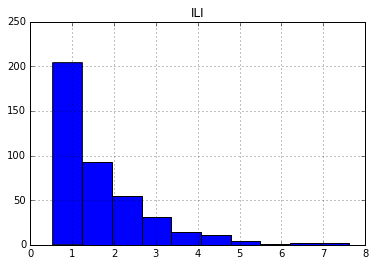

In [12]:
flu.hist('ILI')

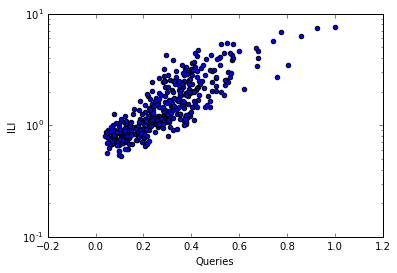

In [34]:
# When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable
# instead of the dependent variable itself -- this prevents the small number of unusually large or small observations
# from having an undue influence on thesum of squared errors of predictive models.

# Plot the natural logarithm of ILI versus Queries.
flu.plot('Queries', 'ILI', kind='scatter', logy=True)

In [38]:
# There is a positive, linear relationship between log(ILI) and Queries.

flu_reg1 = sm.ols(formula='np.log(ILI) ~ Queries', data=flu).fit()
flu_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(ILI)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1011.
Date:                Fri, 01 Jul 2016   Prob (F-statistic):          2.62e-113
Time:                        14:25:05   Log-Likelihood:                -87.974
No. Observations:                 417   AIC:                             179.9
Df Residuals:                     415   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4993      0.030    -16.422      0.000        -0.559    -0.440
Queries        2.9613      0.093     31.800      0.000         2.778     3.144
==============================================================================
Omnibus:                        9.797   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.884
Skew:                           0.373   Prob(JB):                      0.00714
Kurtosis:                       3.112   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
flu['LogILI'] = np.log(flu['ILI'])

In [47]:
flu.corr()['Queries']['LogILI']**2

0.70902005534818757

In [50]:
# Same value of R2 (Cor**2 == R2)

# Performance on the Test Set
flu_test = pd.read_csv('./data/FluTest.csv')
prediction1 = np.exp(flu_reg1.predict(flu_test))

In [58]:
# What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012?
flu_test[flu_test.Week == '2012-03-11 - 2012-03-17'].index
prediction1[10]

2.1873777211145446

In [59]:
# What is the relative error betweeen the estimate (our prediction)
# and the observed value for the week of March 11, 2012?

(flu_test.ILI[10] - prediction1[10])/flu_test.ILI[10]

0.046238266364746219

In [ ]:
# What is the Root Mean Square Error (RMSE) between our estimates and the actual observations
# for the percentage of ILI-related physician visits, on the test set?
SSE = sum((prediction1 - flu_test.ILI)**)